# CNN전이학습_data_augmentation
* 전이학습: 사전에 훈련된 모델을 가져와서 사용하는 것
* data_agmentation: 이미지 데이터의 경우 데이터가 적어서 확보가 어려움, 비쌈, 기존 이미지데이터에 변형을 가해서 데이터 수를 늘리는 작업(회전, 확대, 축소, 자르기)
# Image Augmentation
* 학습데이터 부족을 해결하기 위해서 이미지에 변형을 가해 새로운 이미지를 만들어 주는 것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, array_to_img, load_img

In [4]:
image = load_img("./data/bird.jpg")
image_array = img_to_array(image)
image_array.shape

(703, 454, 3)

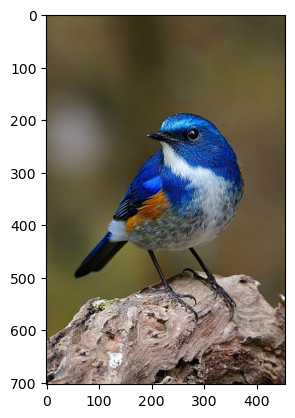

In [5]:
plt.imshow(image)
plt.show()

# Image Augmentation(이미지 증폭)

In [7]:
imggen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.6,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

## 차원 늘리기

In [8]:
(1,) + image_array.shape

(1, 703, 454, 3)

In [9]:
# image_array = image_array.reshape((1, 703, 454, 3))
image_array = image_array.reshape((1,) + image_array.shape)

In [10]:
image_array.shape

(1, 703, 454, 3)

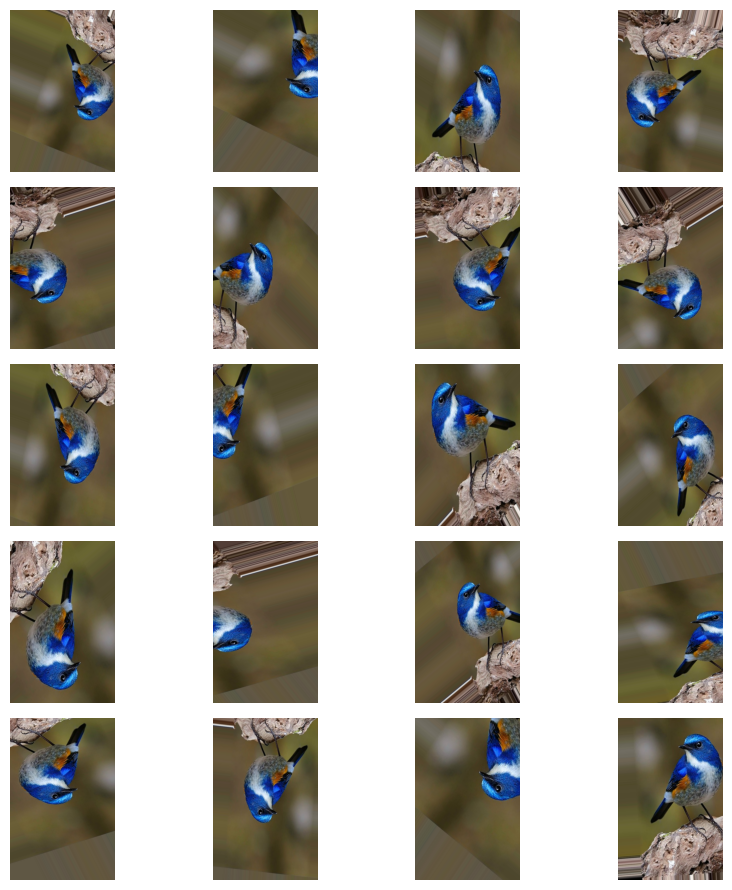

In [11]:
fig, axes = plt.subplots(5, 4, figsize=(9,9))
axes = axes.ravel()
for i, batch in enumerate(imggen.flow(image_array, batch_size=1)):
    if i >= 20:
        break
    augmented_image = array_to_img(batch[0])
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# image_augemtation을 이용한 강아지/고양이 분류 모델 만들기

In [49]:
# 데이터 로드
train_dir = "./data/train/"
valid_dir = "./data/validation/"
batch_size = 16 # 한 번에 불러오는 사진의 개수, 분석 모델에 따라서 16, 32 사이로 지정
image_size = (224, 224) # 모델의 입력 크기에 맞춤

In [50]:
# 이미지 증강
train_aug = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.6,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_aug = ImageDataGenerator(rescale=1./255)

# 이미지 제너레이터
train_gen = train_aug.flow_from_directory(
            train_dir,
            target_size = image_size,
            batch_size = batch_size,
            class_mode='categorical',
            shuffle=True,
            seed=42 #random_state랑 같은 거
            )

valid_gen = valid_aug.flow_from_directory(
            valid_dir,
            target_size = image_size,
            batch_size = batch_size,
            class_mode='categorical',
            shuffle=True,
            seed=42
            )

X_batch, y_batch = next(train_gen)
print(X_batch.shape)
print(y_batch.shape)
print(train_gen.class_indices)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
(16, 224, 224, 3)
(16, 2)
{'Cat': 0, 'Dog': 1}


# CNN을 이용한 강아지/고양이 분류

In [51]:
from keras.models import Sequential, load_model
from keras. layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [60]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(224,224,3)))
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))
cnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,815,266 (10.74 MB)

 Trainable params: 2,815,266 (10.74 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf

In [57]:
cnn_model2 = Sequential()
cnn_model2.add(Input(shape=(224,224,3)))
cnn_model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dense(2, activation='softmax'))
cnn_model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,815,266 (10.74 MB)

 Trainable params: 2,815,266 (10.74 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
cus_opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [62]:
cnn_model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/1000


2025-12-04 13:04:49.601954: I external/local_xla/xla/service/service.cc:163] XLA service 0x771bec004e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-04 13:04:49.601998: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-12-04 13:04:49.661985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-04 13:04:50.011538: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-12-04 13:04:50.912290: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[16,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudn

 2/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.4688 - loss: 0.7480

I0000 00:00:1764821098.305160    3641 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.4709 - loss: 0.7585

2025-12-04 13:05:10.844430: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[16,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,224,224]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-12-04 13:05:11.094619: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[16,64,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,111,111]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActiv

25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 672ms/step - accuracy: 0.4883 - loss: 0.7204 - val_accuracy: 0.5102 - val_loss: 0.6930
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.5169 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.5221 - loss: 0.6925 - val_accuracy: 0.5102 - val_loss: 0.6922
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.5247 - loss: 0.6919 - val_accuracy: 0.5714 - val_loss: 0.6875
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.5429 - loss: 0.6881 - val_accuracy: 0.5816 - val_loss: 0.6744
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.5247 - loss: 0.6920 - val_accuracy: 0.5816 - val_loss: 0.6824
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.5481 - loss: 0.6890 - val_accuracy: 0.5102 - val_loss: 0.6925
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.5455 - loss: 0.6870 - val_accurac

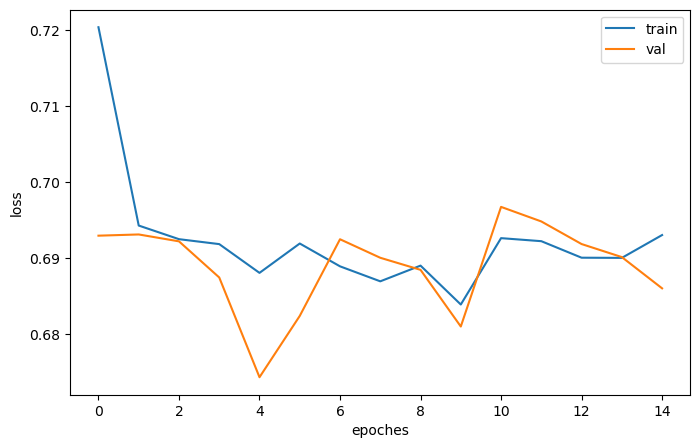

In [63]:
cnn_model2.compile(loss="categorical_crossentropy", optimizer=cus_opt, metrics=['accuracy' ])
model_path = "./model/CNN_catndog2.keras"
checkpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
cnn_history = cnn_model.fit(train_gen, validation_data=valid_gen, epochs=1000,
                    callbacks=[checkpoint, early_stop])
plt.figure(figsize=(8,5))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend( ['train', 'val'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


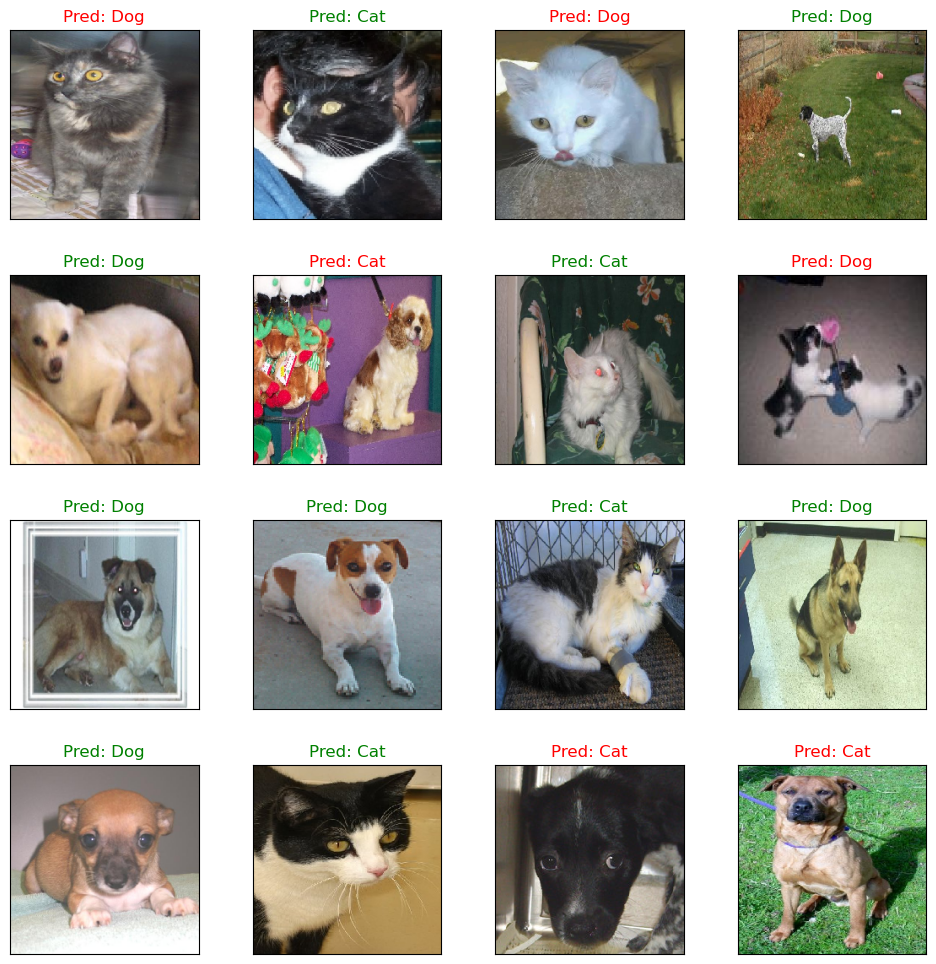


cnn_best_model평가 결과: Loss: 0.6667, Accuracy: 0.6250


In [64]:
# best 모델 로드
cnn_best_model = load_model ("./model/CNN_catndog2.keras")

# 클래스 이름 추출하기
class_indices = valid_gen.class_indices
class_names = [k for k, v in sorted(class_indices.items(), key=lambda x: x[1])]
validation_batch, label_batch = next(iter(valid_gen))

cnn_pred = cnn_best_model.predict(validation_batch)
pred_values = np.argmax(cnn_pred, axis=1)
true_values = np.argmax(label_batch, axis=1)

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3)

num_images = min(16, validation_batch.shape[0])

for i in range(num_images):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation_batch[i], cmap=plt.cm.gray_r)
    
    pred_label = class_names[pred_values[i]]
    true_label = class_names[true_values[i]]
    color = 'green' if pred_values[i] == true_values[i] else 'red'
    ax.set_title(f"Pred: {pred_label}", color=color, fontsize=12)
plt.show()

# loss와 accuracy 출력
loss, acc = cnn_best_model.evaluate(validation_batch, label_batch, verbose=0)
print(f"\ncnn_best_model평가 결과: Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# 전이학습
* 사전에 훈련된 모델을 가지고 새로운 데이터를 넣어서 튜닝을 하거나 결과를 출력
* keras.applications에 있음

# ResNet50
* ResNet50에 사용할 경우, rescale=1./255는 제거하고 preprocessing_function=preprocess_input을 사용
* Keras의 ResNet50은 입력 이미지를 BGR로 바꾸고 채널별 평균을 빼는 전처리를 필요로 하기 때문
- 이미지 분류할 때 성능이 좋은 모델 중 하나!

In [77]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()

In [2]:
from tensorflow.keras. layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50, ResNet152V2
from tensorflow.keras.applications.resnet import preprocess_input

2025-12-04 13:34:27.541930: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 13:34:27.773495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-04 13:34:33.491267: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [79]:
# ResNet50 맞는 이미지 증강기 (rescale 제거, preprocess_input 사용)
# 이미지 증강
train_aug = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.6,
        zoom_range=0.3,
        #horizontal_flip=True,
        #vertical_flip=True,
        fill_mode='nearest')

valid_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

# 이미지 제너레이터
train_gen = train_aug.flow_from_directory(
            train_dir,
            target_size = image_size,
            batch_size = batch_size,
            class_mode='categorical',
            shuffle=True,
            seed=42 #random_state랑 같은 거
            )

valid_gen = valid_aug.flow_from_directory(
            valid_dir,
            target_size = image_size,
            batch_size = batch_size,
            class_mode='categorical',
            shuffle=True,
            seed=42
            )

X_batch, y_batch = next(train_gen)
print(X_batch.shape)
print(y_batch.shape)
print(train_gen.class_indices)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
(16, 224, 224, 3)
(16, 2)
{'Cat': 0, 'Dog': 1}


In [80]:
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3), pooling='avg')

In [81]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_16[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [82]:
base_model.trainable = False
res50_model = Sequential()
res50_model.add(base_model)
res50_model.add(Dense(2, activation='softmax'))
res50_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [83]:
res50_model.compile(loss="categorical_crossentropy", optimizer=cus_opt, metrics=['accuracy' ])
model_path = "./model/res50_model_catndog2.keras"
checkpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
res50_history = res50_model.fit(train_gen, validation_data=valid_gen, epochs=1000,
                    callbacks=[checkpoint, early_stop])
plt.figure(figsize=(8,5))
plt.plot(res50_history.history['loss'])
plt.plot(res50_history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend( ['train', 'val'])
plt.show()

Epoch 1/1000


/home/user/miniforge3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
2025-12-04 13:30:32.919274: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 55.69MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-12-04 13:30:42.937533: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 49.00MiB (rounded to 51380224)requested by op Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will 

2025-12-04 13:30:42.950529: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 114688 totalling 112.0KiB
2025-12-04 13:30:42.950536: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 129792 totalling 126.8KiB
2025-12-04 13:30:42.950542: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 7 Chunks of size 147456 totalling 1008.0KiB
2025-12-04 13:30:42.950549: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 163072 totalling 159.2KiB
2025-12-04 13:30:42.950556: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 180224 totalling 176.0KiB
2025-12-04 13:30:42.950563: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 16 Chunks of size 262144 totalling 4.00MiB
2025-12-04 13:30:42.950570: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 273664 totalling 267.2KiB
2025-12-04 13:30:42.950611: I external/local_xla/xla/tsl/framework/b

ResourceExhaustedError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[16,56,56,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(16, 56, 56, 64), dtype=float32)

ling 2.81MiB
2025-12-04 13:30:42.950841: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 3080192 totalling 2.94MiB
2025-12-04 13:30:42.950847: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 3145728 totalling 3.00MiB
2025-12-04 13:30:42.950854: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 2 Chunks of size 3670016 totalling 7.00MiB
2025-12-04 13:30:42.950861: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 13 Chunks of size 4194304 totalling 52.00MiB
2025-12-04 13:30:42.950868: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 2 Chunks of size 5242880 totalling 10.00MiB
2025-12-04 13:30:42.950875: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 2 Chunks of size 6029312 totalling 11.50MiB
2025-12-04 13:30:42.950881: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1113] 1 Chunks of size 6291456 totalling 6.00MiB
2025-12-04 13:30:42.950887: I external/local_xla/xla

In [3]:
# ✅ 모델 로드
res50_best_model = load_model("./model/res50_model_catndog2.keras")

# ✅ 클래스 이름 추출
class_indices = valid_gen.class_indices
class_names = [k for k, v in sorted(class_indices.items(), key=lambda x: x[1])]

# ✅ 전체 validation 데이터로 예측
cnn_pred = res50_best_model.predict(valid_gen, verbose=1)
pred_values = np.argmax(cnn_pred, axis=1)
true_values = valid_gen.classes  # 전체 정답

# ✅ 정확도 출력
acc = accuracy_score(true_values, pred_values)
print(f"\n[전체 Validation Accuracy] {acc:.4f}")

# ✅ 시각화용: 소량 배치만 가져오기
sample_batch, label_batch = next(valid_gen)
sample_pred = res50_best_model.predict(sample_batch)
sample_pred_values = np.argmax(sample_pred, axis=1)
sample_true_values = np.argmax(label_batch, axis=1)

# ✅ 시각화: 이미지 복구 후 출력
def deprocess_input(x):
    """ResNet의 preprocess_input을 반대로 적용 (BGR→RGB + 평균값 복원)"""
    x = x.copy()
    # ImageNet 평균값 (BGR 순)
    mean = [103.939, 116.779, 123.68]
    x[..., 0] += mean[0]  # B
    x[..., 1] += mean[1]  # G
    x[..., 2] += mean[2]  # R
    x = x[..., ::-1]  # BGR → RGB
    return np.clip(x / 255.0, 0, 1)  # matplotlib은 0~1 사이값을 기대함

# ✅ 이미지 시각화
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.3)
num_images = min(16, sample_batch.shape[0])

for i in range(num_images):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    img = deprocess_input(sample_batch[i])
    ax.imshow(img)
    pred_label = class_names[sample_pred_values[i]]
    true_label = class_names[sample_true_values[i]]
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f"Pred: {pred_label}", color=color, fontsize=12)
plt.show()

# ✅ 전체 평가
loss, acc = res50_best_model.evaluate(valid_gen, verbose=1)
print(f"\n[모델 평가 결과] Loss: {loss:.4f}, Accuracy: {acc:.4f}")

NameError: name 'load_model' is not defined